In [1]:
import numpy as np
from iterLS import ILS
import matplotlib.pyplot as plt

### Generating the data set

The data set we are generating if very simple and easily clustered with most algorithms. Four gaussians with means on the vertices of a square with varying covariance matrices

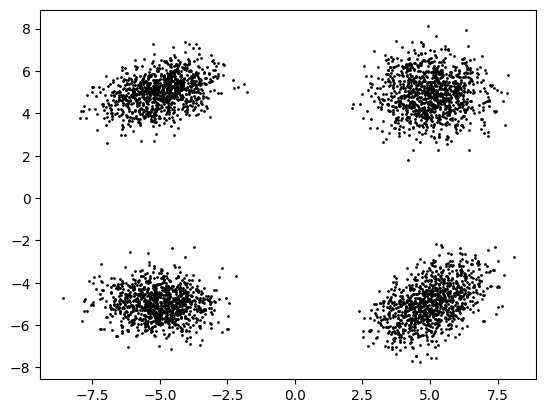

In [2]:
corner = 5

cov_one = np.array([[1, 0], [0, 1]])
cluster_one = np.random.multivariate_normal((corner, corner), cov_one, 1000)
cov_two = np.array([[1, 0], [0, 0.5]])
cluster_two = np.random.multivariate_normal((-corner, -corner), cov_two, 1000)
cov_three = np.array([[1, 0.5], [0.5, 1]])
cluster_three = np.random.multivariate_normal((corner, -corner), cov_three, 1000)
cov_four = np.array([[1, 0.25], [0.25, 0.5]])
cluster_four = np.random.multivariate_normal((-corner, corner), cov_four, 1000)


data_set = np.concatenate((cluster_one, cluster_two, cluster_three, cluster_four), axis = 0)

plt.scatter(data_set[:, 0], data_set[:, 1], s = 1, c  = "black")
plt.show()

### Using ILS

To perform the first label spreading we instantiate the ILS object and parse the data set into the object using label_spreading class method.

To view class documentation use 

```python
?ILS
```

In [5]:
?ILS

In [6]:
?ILS.label_spreading

In [8]:
example_ILS = ILS()
example_ILS.label_spreading(data_set)

### Using the $R_{min}$ Plot

Analysing this plot is how users produce clustering results. For a more thorough description on how to use this plot, read the paper linked in the README. 

We want to segment the plot based on big jumps in the $R_{min}$ or changed in density of the $R_{min}$. In this case, we would segment the plot using the indices (1000, 2000, 3000). Segmentation is not so easier, but there are more example on different data sets in the notebook folder.

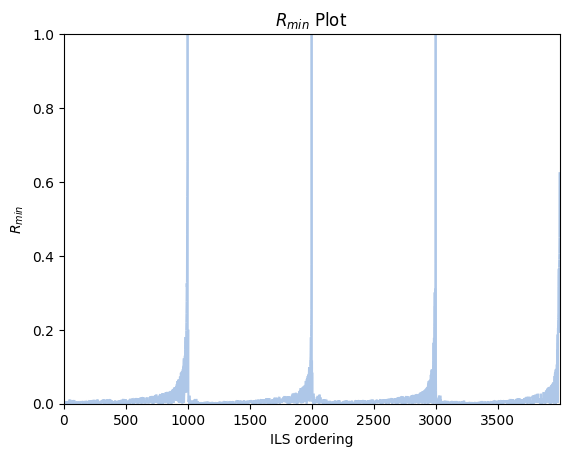

In [9]:
example_ILS.plot_rmin(max_rmin = 1)

### Performing segmentation and second label spreading

Now that we have segmented the points (1000, 2000, 3000). We pass these segments to ILS.segmentation. This will split the univariate $R_{min}$ series into segments, smooth the plot and find the smallest value of the smoothed segment. This is intuitively like finding the point in the cluster with hte highest density. This points will serve as the initial points and labels to the seconday spreading. The indices and labels are then passed to the label spreading again to perform the final clustering.

In [11]:
segmentation_indices = [1000, 2000, 3000] # pass in indices you wish to segment rmin 
indices, labels = example_ILS.segmentation(segmentation_indices)

In [12]:
example_ILS.label_spreading(data_set, indices, labels)

### Final Clustering results

ILS provides a method to plot the final clustering results. 

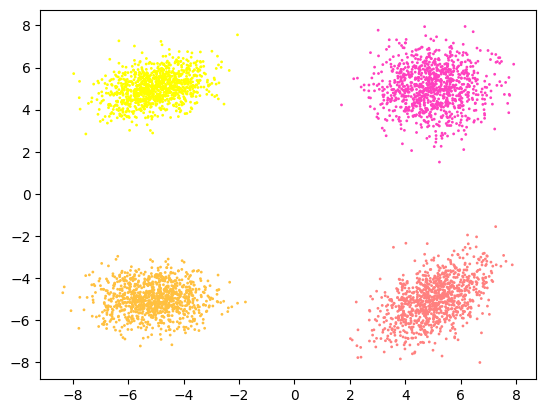

In [10]:
example_ILS.plot_labels()

### ILS Ordering

ILS will plot the order that the algorithm spread through the data set on the FIRST spreading. The ordering of the secondary spreading is uninformative.

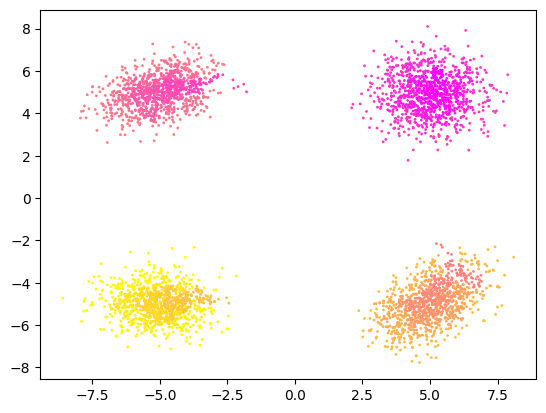

In [13]:
example_ILS.plot_ordering()